In [ ]:
# Import các thư viện cần thiết

import pandas as pd                      # Dùng để xử lý dữ liệu dạng bảng (DataFrame)
import numpy as np                       # Dùng cho các phép toán số học, xử lý mảng (array)

from sklearn.model_selection import train_test_split, cross_val_score
# train_test_split: chia dữ liệu thành tập huấn luyện và kiểm tra (train/test)
# cross_val_score: thực hiện kiểm định chéo (cross-validation) để đánh giá mô hình

from sklearn.preprocessing import StandardScaler, LabelEncoder
# StandardScaler: chuẩn hóa dữ liệu (đưa các giá trị về cùng thang đo mean=0, std=1)
# LabelEncoder: mã hóa nhãn phân loại (chuỗi → số nguyên)

from lightgbm import LGBMClassifier
# Mô hình học máy LightGBM — rất mạnh cho các bài toán phân loại (classification)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# accuracy_score: tính độ chính xác của mô hình
# classification_report: xuất các chỉ số Precision, Recall, F1-score
# confusion_matrix: ma trận nhầm lẫn, giúp xem mô hình dự đoán đúng/sai thế nào

import seaborn as sns                    # Thư viện vẽ biểu đồ đẹp, thường dùng cho trực quan hóa dữ liệu
import matplotlib.pyplot as plt          # Thư viện đồ thị cơ bản trong Python
import joblib                            # Dùng để lưu và tải lại mô hình (model) đã huấn luyện


In [ ]:

# Đường dẫn tới file
file_path = '/content/sample_data/Dataset.csv'

# Đọc file CSV
df = pd.read_csv(file_path)

In [ ]:
import pandas as pd

# Đường dẫn tới file
file_path = '/content/sample_data/Dataset.csv'

# Đọc file CSV
df = pd.read_csv(file_path)

# Xem 5 dòng đầu tiên
print(df.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/sample_data/Dataset.csv')

In [ ]:
# Hiển thị thông tin cơ bản về dữ liệu
print("Thông tin dữ liệu:")
print(data.info())
print("\n5 dòng đầu tiên của dữ liệu:")
print(data.head())

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

5 dòng đầu tiên của dữ liệu:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<Axes: xlabel='label'>

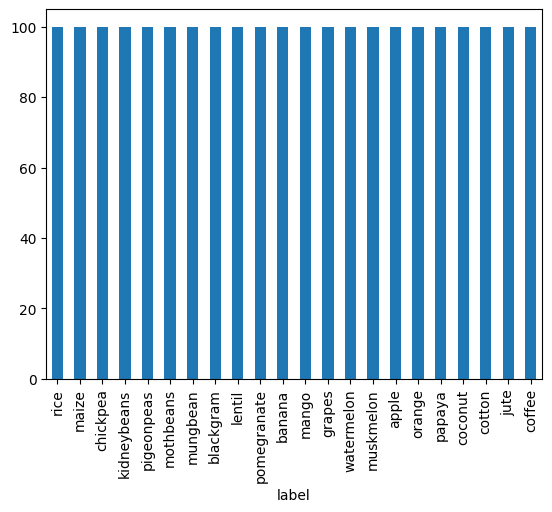

In [ ]:
df['label'].value_counts().plot.bar()


In [ ]:
# Tách đặc trưng (features) và nhãn (label)
X = data.drop('label', axis=1)  # Các cột N, P, K, temperature, humidity, ph, rainfall
y = data['label']  # Cột nhãn (loại cây trồng)

In [ ]:
# Mã hóa nhãn (label) thành số
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Chuẩn hóa đặc trưng
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Khởi tạo và huấn luyện mô hình LGBM Classifier với tham số tối ưu
model = LGBMClassifier(
    n_estimators=200,        # Số cây quyết định
    learning_rate=0.05,      # Tốc độ học
    max_depth=10,            # Độ sâu tối đa của cây
    random_state=42
)
model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] 

LGBMClassifier(learning_rate=0.05, max_depth=10, n_estimators=200,
               random_state=42)

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác trên tập kiểm tra: {accuracy * 100:.2f}%")


Độ chính xác trên tập kiểm tra: 98.64%


In [ ]:
# Báo cáo chi tiết (precision, recall, f1-score)
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Báo cáo phân loại:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      p

In [ ]:
# Đánh giá bằng cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"\nĐộ chính xác trung bình từ cross-validation (5-fold): {cv_scores.mean() * 100:.2f}% ± {cv_scores.std() * 100:.2f}%")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 1408, number of used features: 7
[LightGBM] [Info] Start training from score -3.139052
[LightGBM] [Info] Start training from score -3.106791
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.172388
[LightGBM] [Info] Start training from score -3.172388
[LightGBM] [Info] Start training from score -3.060271
[LightGBM] [Info] Start training from score -3.060271
[LightGBM] [Info] Start training from score -3.030418
[LightGBM] [Info] Start training from score -3.122791
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.973259
[LightGBM] [Info] Start training from score -3.106791
[LightGBM] [Info] Start training from score -3.075538
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 1408, number of used features: 7
[LightGBM] [Info] Start training from score -3.122791
[LightGBM] [Info] Start training from score -3.106791
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.172388
[LightGBM] [Info] Start training from score -3.172388
[LightGBM] [Info] Start training from score -3.045233
[LightGBM] [Info] Start training from score -3.045233
[LightGBM] [Info] Start training from score -3.015819
[LightGBM] [Info] Start training from score -3.139052
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.987246
[LightGBM] [Info] Start training from score -3.106791
[LightGBM] [Info] Start training from score -3.075538
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1326
[LightGBM] [Info] Number of data points in the train set: 1408, number of used features: 7
[LightGBM] [Info] Start training from score -3.122791
[LightGBM] [Info] Start training from score -3.106791
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.172388
[LightGBM] [Info] Start training from score -3.189483
[LightGBM] [Info] Start training from score -3.045233
[LightGBM] [Info] Start training from score -3.045233
[LightGBM] [Info] Start training from score -3.015819
[LightGBM] [Info] Start training from score -3.139052
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.987246
[LightGBM] [Info] Start training from score -3.106791
[LightGBM] [Info] Start training from score -3.075538
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 1408, number of used features: 7
[LightGBM] [Info] Start training from score -3.122791
[LightGBM] [Info] Start training from score -3.106791
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.155581
[LightGBM] [Info] Start training from score -3.189483
[LightGBM] [Info] Start training from score -3.060271
[LightGBM] [Info] Start training from score -3.060271
[LightGBM] [Info] Start training from score -3.015819
[LightGBM] [Info] Start training from score -3.122791
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.987246
[LightGBM] [Info] Start training from score -3.106791
[LightGBM] [Info] Start training from score -3.075538
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1326
[LightGBM] [Info] Number of data points in the train set: 1408, number of used features: 7
[LightGBM] [Info] Start training from score -3.139052
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.172388
[LightGBM] [Info] Start training from score -3.189483
[LightGBM] [Info] Start training from score -3.060271
[LightGBM] [Info] Start training from score -3.060271
[LightGBM] [Info] Start training from score -3.015819
[LightGBM] [Info] Start training from score -3.122791
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.987246
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


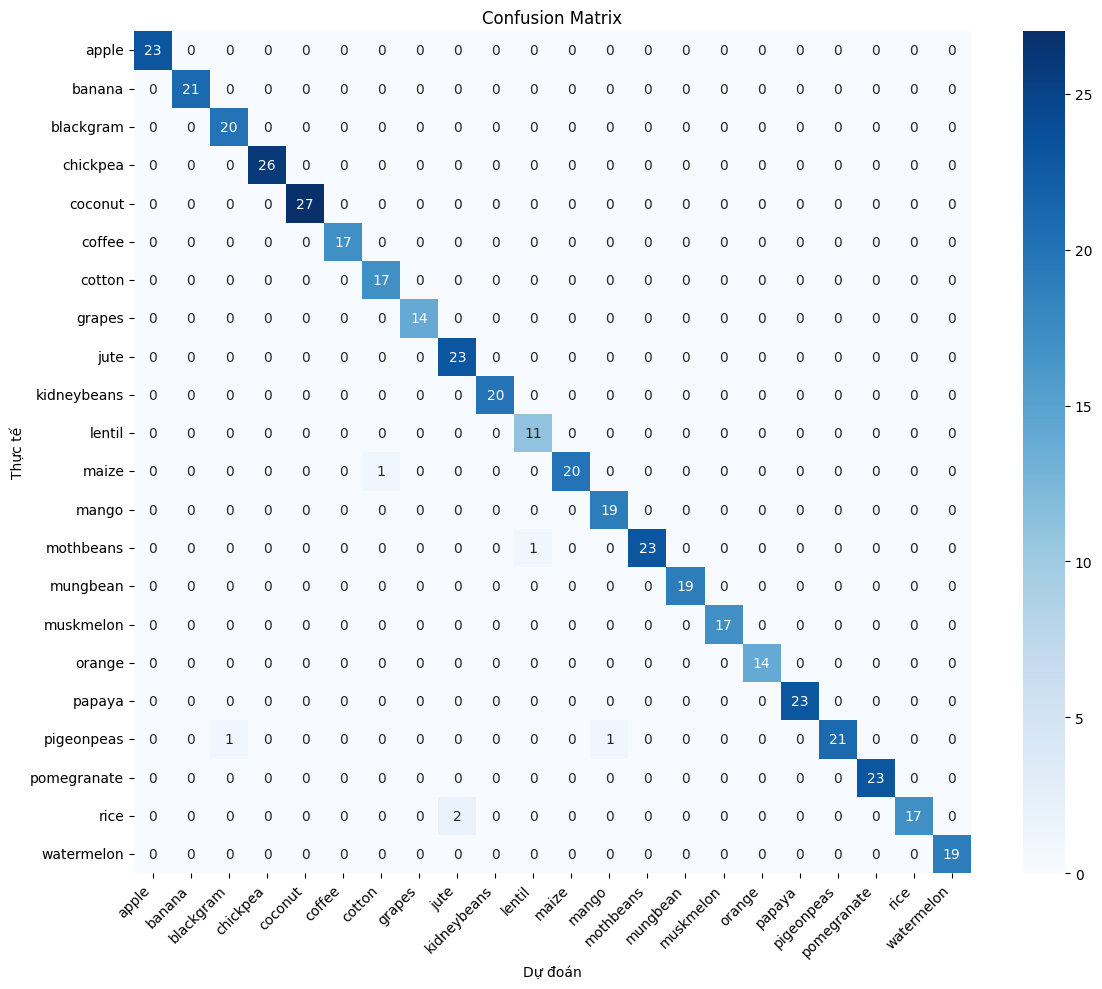

In [ ]:
# Vẽ Confusion Matrix để phân tích lỗi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
prediction = model.predict(new_data_scaled)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Ví dụ dự đoán cho một mẫu dữ liệu mới
new_data = pd.DataFrame(
    [[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]],
    columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
)
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
predicted_crop = label_encoder.inverse_transform(prediction)[0]
print(f"\nDự đoán loại cây trồng cho mẫu mới: {predicted_crop}")


Dự đoán loại cây trồng cho mẫu mới: rice


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Lưu mô hình, scaler và label encoder
joblib.dump(model, 'lgbm_crop_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
print("\nĐã lưu mô hình, scaler và label encoder thành file .pkl")


Đã lưu mô hình, scaler và label encoder thành file .pkl
